# Toy example: MNIST

We have seen that the MNIST dataset contains handwritten numbers from 0-9 in the from of small 28x28 pixel image. Our goal here will be to train a fully connected neural network to **classify** these images correctly.

## Packages

In order to write the necessary code, we import a few Python packages, in particular modules from Keras, a library built on top of Tensorflow that makes it easy to define neural networks:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical, plot_model

## Dataset

MNIST being a popular test and toy model, it comes integrated into multiple packages. We can just download the necesssary image using:


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


The last four lines tell us that we have 60'000 images in our training dataset and each of them have 28x28 pixels. Correspondingly we have 60'000 labels telling us what number is displayed in each image. Similarly, we have 10'000 images and labels to use as test for our model. 

## Visualizing the data

Before creating our model, let's have a look at our dataset. We can plot a few images and their labels:

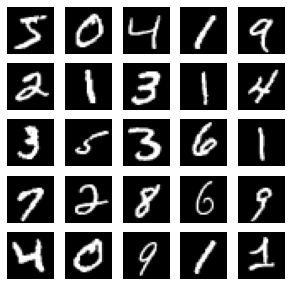

In [3]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X_train[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

## Data pre-processing

Before we can actually feed data to a network there are always some pre-processing steps.

For example, ss we have seen, we use here a simple model where all pixels are connected to each other and where the image is "linearized". Currently our data are still in 28x28 = 784 pixel format so we need to reshape them. We also change the pixel values from a 0-255 scale to a 0-1 scale:

In [4]:
input_size = 784

X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

Our labels are currently just a list of numbers 5,2,8,5,1,9,4,5,2 etc. To be usable in ML we have to use one-hot encoding. Each of these numbers is transformed into a list composed of zeros, except at the location corresponding to the number which has a 1. For example, the number 3 is represented as: [0,0,0,1,0,0,0,0,0,0]

In [5]:
# convert to one-hot vector
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

## Model architecture

Now comes the center of our exercise: defining the neural network model. 

In [6]:
# model initialization
model = Sequential()
# define input size
model.add(Input(shape=(784,)))

# define first layer
model.add(Dense(512, activation='relu'))

# define second layer
model.add(Dense(512, activation='relu'), )

# define last layer, one neuron per number
model.add(Dense(10))

# classifier
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


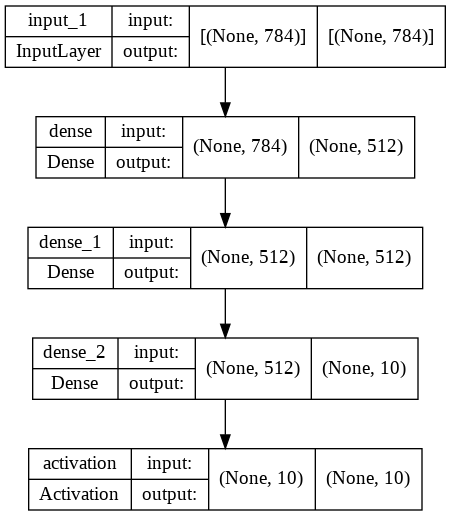

In [7]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## Model optimization

Now we define how we are going to train the model. For example what do we measure to say that the model is ok or not, what type of gradient descent we use etc.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

We can finally run the training!

In [9]:
model.fit(X_train, Y_train, batch_size=256, epochs=5, verbose=1)

Epoch 1/5
235/235 [==============================] - 4s 3ms/step - loss: 0.2666 - accuracy: 0.9235
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9732
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9813
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9882
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9908


## Evaluation

Now that the model is trained, we can try it out on our test data, those data that the model has never seen before:

In [10]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0698 - accuracy: 0.9788
Test score: 0.06984997540712357
Test accuracy: 0.9787999987602234


We reached above 90% accuracy!

## Where did it go wrong

From the samples in the test set we can now have a look at examples that worked and didn't work. This is important in order to understand 

In [11]:
predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

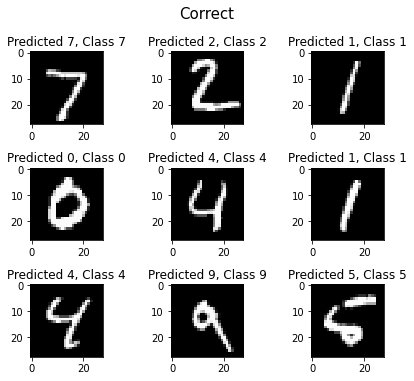

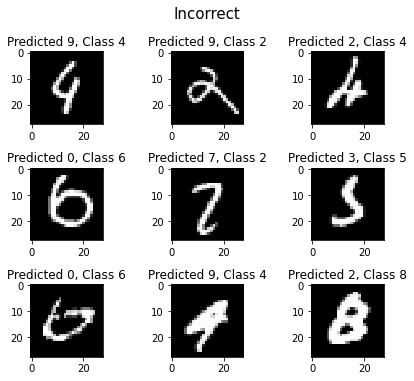

In [12]:
fig, ax = plt.subplots(3,3, figsize=(6,5))
for ax, correct in zip(ax.flat, correct_indices[:9]):
    ax.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    ax.set_title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
fig.suptitle('Correct', y=1.05, fontsize=15)
    
plt.tight_layout()
    
fig, ax = plt.subplots(3,3, figsize=(6,5))
for ax, incorrect in zip(ax.flat, incorrect_indices[:9]):
    ax.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    ax.set_title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
fig.suptitle('Incorrect', y=1.05, fontsize=15)
  
plt.tight_layout()